In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dont-overfit-ii/sample_submission.csv
/kaggle/input/dont-overfit-ii/train.csv
/kaggle/input/dont-overfit-ii/test.csv


### Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Datasets

In [6]:
path = '/kaggle/input/dont-overfit-ii/'
train_data = pd.read_csv(path + 'train.csv')
test_data = pd.read_csv(path + 'test.csv')
sample_submission = pd.read_csv(path + 'sample_submission.csv')

In [7]:
train_data.head()

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,-0.338,0.416,-2.177,-0.326,0.340,1.174,-0.245,-1.070,-0.336,-0.502,0.403,-0.605,-0.280,-1.618,0.878,-0.272,0.870,2.171,-0.214,0.477,-2.092,0.835,0.621,-2.810,1.029,-0.736,0.582,-0.079,0.493,1.359,-0.177,0.406,-0.163,1.341,0.754,0.491,-1.560,-0.520,0.766,...,-1.754,0.297,-2.196,0.798,-0.533,-0.661,0.564,-2.400,0.945,-0.971,0.055,1.107,-0.848,-1.781,0.254,-0.515,0.234,0.296,-1.774,2.032,-0.442,-0.116,1.393,-0.494,-0.179,1.874,1.463,-1.397,0.284,0.336,0.551,0.557,-0.522,-0.503,-0.541,1.393,0.506,-1.420,-0.123,-1.833,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,1.202,0.542,0.424,-1.572,-0.968,-1.483,0.564,0.047,-0.324,-1.490,0.179,-0.524,0.250,2.462,0.029,-1.399,-2.370,-1.505,-1.294,0.106,-0.145,0.235,-1.045,1.335,1.254,-0.811,1.812,0.181,-0.020,1.125,0.279,-0.682,1.161,1.194,0.243,1.179,1.338,-1.000,-0.362,...,-1.935,-1.365,-1.609,-0.119,-0.690,-0.239,0.919,0.182,-0.203,-1.034,0.627,-1.472,0.496,-0.052,0.322,-0.222,1.168,0.931,-0.203,0.321,0.761,1.752,0.181,-3.029,-0.578,-0.260,-0.425,-0.160,-0.497,-0.049,1.097,0.398,0.554,0.578,-0.544,0.441,-0.524,-1.474,-0.090,-0.607,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,-0.017,-0.665,1.905,0.376,-1.373,1.587,1.464,-1.550,-0.512,0.508,-0.094,-0.114,-0.425,0.104,0.643,-1.371,1.553,-0.062,-0.173,-0.465,-1.252,0.443,2.205,-1.266,-0.739,0.827,-1.306,0.274,-1.573,-2.011,-1.228,-1.588,-0.825,-0.259,1.461,-1.751,-0.054,-0.026,-0.511,...,0.218,1.675,-1.223,0.206,2.153,0.257,1.761,0.848,-0.960,1.468,-1.610,-0.801,1.557,0.628,-0.072,-0.573,0.507,-1.229,0.313,1.446,-0.345,1.147,-0.623,-0.048,1.456,-0.932,0.666,0.451,0.671,-0.596,-0.135,0.966,-0.167,0.530,-1.493,-0.917,0.120,0.258,-0.405,-0.859,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,-0.638,0.760,-0.360,-2.048,-0.996,-0.361,0.962,0.021,0.595,-0.943,0.069,0.483,-0.063,-0.540,-0.551,-1.736,-2.014,0.636,-1.147,-0.767,-0.678,0.815,1.696,-0.436,-1.777,0.548,0.318,0.978,1.299,-0.540,0.248,1.791,-1.150,0.875,0.957,-1.859,0.000,-2.028,-0.315,...,1.384,-0.260,1.857,-0.319,-0.457,2.215,0.321,0.601,0.131,-1.137,0.011,1.137,0.499,-0.262,-1.484,0.216,-2.536,0.191,-0.142,1.387,-1.617,-0.662,-2.288,-1.130,0.651,-0.363,0.686,-0.504,1.734,-0.606,0.514,-0.506,-1.294,0.382,-1.119,1.695,-0.775,-1.428,0.231,-0.780,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,-0.499,-0.653,-0.058,-0.046,0.654,-0.697,-1.175,0.720,0.484,0.402,-1.037,1.081,0.716,-0.144,1.720,-1.980,-0.741,-1.493,-0.860,-0.082,0.133,1.084,-0.719,0.198,1.144,1.123,0.435,-0.296,-2.933,0.831,1.905,0.485,0.490,-0.199,-0.269,1.141,0.007,2.126,-0.049,...,0.477,-0.292,-0.635,0.341,1.332,1.940,0.403,0.377,-0.464,0.786,0.285,-0.464,1.427,0.554,-0.131,-1.425,0.487,0.413,-0.231,1.570,-0.714,0.385,-0.072,0.150,-0.228,0.144,-1.537,0.664,-0.133,0.424,0.926,-0.089,-0.415,0.299,-1.227,-2.578,0.600,2.167,-0.755,-1.265,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


In [9]:
train_data.isnull().sum()

id        0
target    0
0         0
1         0
2         0
         ..
295       0
296       0
297       0
298       0
299       0
Length: 302, dtype: int64

In [10]:
test_data.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,250,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,-1.380,0.001,-1.340,-0.371,-0.735,-0.545,-0.525,-1.139,1.263,-0.240,0.931,-1.151,0.938,0.720,-1.543,-1.467,0.402,0.538,0.614,-0.318,-1.417,0.471,-1.139,2.294,-0.577,-0.190,-1.252,-1.708,0.415,-1.450,2.212,0.669,2.079,-1.006,-0.867,1.165,1.110,-0.419,-0.807,0.464,...,1.309,-1.055,0.987,0.979,-0.805,2.190,0.451,0.200,-1.133,0.029,0.188,-0.756,-0.542,-0.231,0.306,-0.680,0.727,1.372,0.794,-0.930,0.652,-0.398,-0.236,1.621,0.089,-0.282,0.170,0.514,-0.321,1.038,-0.336,-1.170,0.245,-0.032,0.227,1.757,-1.513,-1.058,-0.559,0.664,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,251,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,0.584,2.620,1.373,0.257,0.322,-0.009,1.844,0.576,0.686,0.095,-0.906,-0.773,-0.781,-0.659,-1.284,-0.922,-0.097,-0.464,-0.277,-0.320,0.330,-0.780,1.050,2.206,-0.587,1.220,1.350,-0.779,-0.160,0.119,-0.029,-0.089,-0.219,-0.678,-1.141,-0.767,-1.287,0.085,0.290,0.222,...,0.118,1.318,-0.568,-0.488,-1.211,0.959,-1.622,0.280,1.574,1.640,0.513,1.831,0.584,0.482,-0.917,-0.148,-0.165,0.856,-0.029,-0.648,-0.506,0.462,-0.310,0.139,1.952,0.708,0.018,0.158,-1.415,-0.760,-0.191,-0.051,0.127,-0.340,-0.463,1.153,0.680,-0.624,-1.090,-0.681,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,252,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,0.714,0.566,-2.343,-0.716,-1.326,-2.521,-1.481,-0.310,-0.852,-1.010,-0.814,0.549,0.113,-0.017,0.803,0.308,-0.589,1.403,0.596,1.140,-0.731,-0.785,1.103,0.690,-1.630,0.591,0.072,-1.458,0.236,0.189,0.995,-0.822,1.281,-1.716,-1.918,0.068,-1.500,1.930,-1.036,-1.216,...,-2.567,0.025,0.910,0.309,-0.527,0.363,-0.466,0.079,0.084,0.679,0.174,-0.042,-1.843,-0.136,0.277,-0.537,0.010,-1.904,-1.297,0.909,0.734,-0.319,0.009,-0.534,-0.267,-1.202,-0.139,0.221,-0.473,-0.842,-0.258,1.578,-2.053,0.542,-0.524,0.840,0.088,0.957,1.394,1.761,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,253,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,-0.205,-1.150,1.408,-0.625,0.296,-1.264,0.180,-0.595,0.277,2.246,2.334,1.059,-1.074,0.787,1.454,0.012,0.049,0.333,1.016,0.052,-1.179,-0.501,0.157,-0.289,-2.072,-0.827,0.091,-1.373,1.407,-1.569,2.060,-0.170,-0.831,-0.368,1.248,-1.058,1.916,-1.593,-1.273,0.018,...,0.461,-1.279,-0.509,1.138,1.605,1.784,0.294,0.986,1.957,-1.137,0.554,1.532,-0.485,0.524,1.013,1.943,-1.576,0.292,-0.821,-0.395,0.728,-0.328,-0.441,0.273,-1.213,0.924,0.439,-1.023,-0.091,-0.507,-1.159,-0.644,0.037,0.518,2.475,-1.029,-0.250,0.971,-0.270,-0.500,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,254,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,-0.400,0.636,0.580,-0.464,-0.102,-0.577,-0.095,0.696,-0.378,1.628,0.770,-0.355,0.426,0.882,-2.685,-0.043,-0.665,1.905,0.726,-1.239,0.615,-0.262,0.800,0.529,-0.883,-2.015,1.083,-0.402,0.839,0.931,1.665,-0.460,-1.558,0.016,-2.362,1.769,0.212,-0.778,-0.896,-0.276,...,-0.633,-0.872,-0.104,2.161,0.950,0.134,0.171,-0.476,-0.206,0.857,0.017,-0.860,0.739,-0.803,-0.925,1.020,-0.056,-0.214,1.165,-0.494,0.700,-0.274,-1.253,-0.624,-2.015,0.057,-1.496,-0.068,0.698,0.236,-0.506,-0.367,-1.885,-0.541,-0.387,-1.306,-0.155,0.476,-1.131,0.080,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010


In [11]:
del train_data['id']
del test_data['id']

### Examine the target column

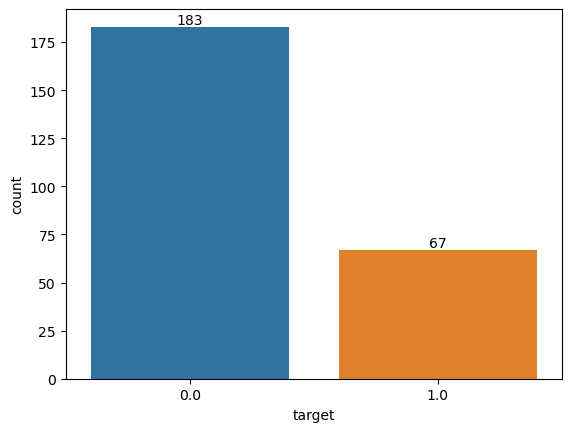

In [12]:
ax = sbn.countplot(x = train_data['target'])
ax.bar_label(ax.containers[0]);

In [13]:
train_data.shape, test_data.shape

((250, 301), (19750, 300))

In [15]:
abs(train_data.corr()['target']).sort_values(ascending = False)

target    1.000000
127       0.337540
176       0.217100
18        0.206452
59        0.203166
            ...   
108       0.001018
111       0.000971
246       0.000778
263       0.000624
269       0.000211
Name: target, Length: 301, dtype: float64

### X and Y

In [17]:
x = train_data.drop('target', axis = 1)
y = train_data['target']

In [18]:
def classification(x, y):
    model1 = LogisticRegression()
    model2 = DecisionTreeClassifier()
    model3 = RandomForestClassifier()
    model4 = BernoulliNB()
    model5= GaussianNB()
    model6 = SVC()
    model7 = GradientBoostingClassifier()
    model8 = AdaBoostClassifier()
    model9 = HistGradientBoostingClassifier()
    model10 = BaggingClassifier()
    model11 = XGBClassifier()
    
    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11]
    model_names = ['Logistic', 'Decision', 'Random', 'Bernoulli', 'Gaussian', 'Support', 'Gradient',
                  'AdaBoost', 'Hist', 'Bagging', 'XGBoost']
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    # x_train = MinMaxScaler().fit_transform(x_train)
    # x_test = MinMaxScaler().fit_transform(x_test)
    
    acc = []
    #cnf_matrix = confusion_matrix()
    skor = pd.DataFrame(columns = ['Accuracy'], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred) * 100)
        
    skor['Accuracy'] = acc
                                   
    print(skor.sort_values('Accuracy', ascending = False))
        
    plt.figure(figsize=(10, 6))
    sbn.barplot(data = skor, y ='Accuracy', x = skor.index, color = 'lightblue')
    for i, v in enumerate(skor['Accuracy']):
        plt.text(i, v, str(round(v, 2)), color='black', ha='center')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Scores of Classification Models')
    plt.show()

           Accuracy
Hist           84.0
Logistic       80.0
Support        80.0
Random         78.0
Bagging        78.0
XGBoost        78.0
Gaussian       74.0
Gradient       74.0
AdaBoost       74.0
Bernoulli      72.0
Decision       52.0


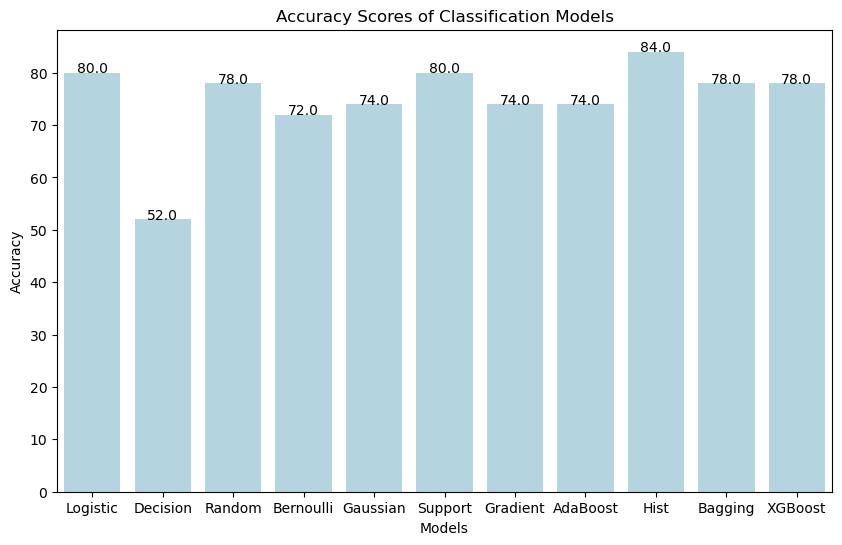

In [19]:
classification(x, y)

### Correlation

In [20]:
abs(train_data.corr()['target']).sort_values(ascending = False).head(10)

target    1.000000
127       0.337540
176       0.217100
18        0.206452
59        0.203166
135       0.179960
16        0.179796
241       0.173879
126       0.167064
69        0.164571
Name: target, dtype: float64

In [22]:
df = train_data[['127', '176', '18', '59', '135', '16', '241', '126', '69', 'target']]
df

,127,176,18,59,135,16,241,126,69,target
0,1.573,-0.608,-0.502,-1.370,-0.230,-1.070,0.513,1.494,0.169,1.0
1,1.290,1.068,-1.490,3.080,-0.614,0.047,0.962,0.336,2.208,0.0
2,0.016,1.999,0.508,0.693,-0.312,-1.550,1.004,0.649,-1.758,0.0
3,0.816,-2.854,-0.943,-1.248,1.261,0.021,-1.140,-0.723,1.359,1.0
4,-0.815,1.524,0.402,-0.414,0.462,0.720,-1.009,-0.763,0.479,0.0
...,...,...,...,...,...,...,...,...,...,...
245,0.124,-0.249,-0.367,1.802,0.036,0.368,-0.846,-0.351,-1.227,1.0
246,-2.212,0.914,-0.598,0.080,-0.310,-0.955,-0.773,0.446,0.714,0.0
247,0.053,0.403,-0.502,0.594,-0.825,-0.690,-0.771,1.846,2.778,0.0
248,-0.542,1.986,-0.446,0.428,-0.620,-0.855,0.155,0.612,0.468,1.0


In [23]:
x1 = df.drop('target', axis = 1)
y1 = df['target']

           Accuracy
Random         86.0
Gaussian       86.0
Logistic       84.0
Bagging        82.0
XGBoost        82.0
Bernoulli      80.0
Support        76.0
AdaBoost       74.0
Hist           74.0
Gradient       72.0
Decision       68.0


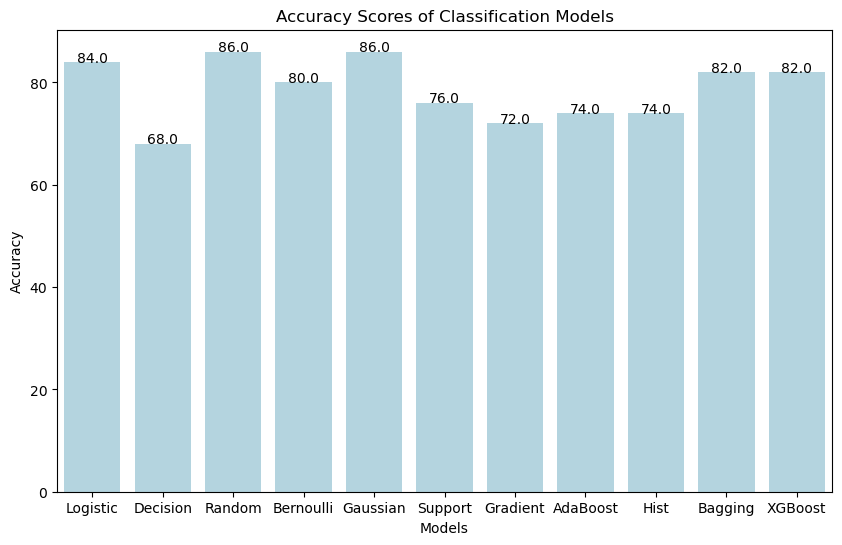

In [24]:
classification(x1, y1)

### Deep Learning

In [25]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [26]:
model = Sequential()
model.add(Dense(units = 65, activation = 'relu'))
model.add(Dense(units = 112, activation = 'relu'))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 10, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy') 

In [27]:
early = EarlyStopping(monitor = 'val_accuracy', patience = 10, mode = 'max')

In [28]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_true), epochs = 100, batch_size = 32, verbose = 1, callbacks = [early])

Epoch 1/100
7/7 [==============================] - 4s 81ms/step - loss: 0.6344 - accuracy: 0.6700 - val_loss: 0.5330 - val_accuracy: 0.8000
Epoch 2/100
7/7 [==============================] - 0s 28ms/step - loss: 0.5562 - accuracy: 0.7150 - val_loss: 0.5459 - val_accuracy: 0.8000
Epoch 3/100
7/7 [==============================] - 0s 29ms/step - loss: 0.4832 - accuracy: 0.7150 - val_loss: 0.5142 - val_accuracy: 0.8000
Epoch 4/100
7/7 [==============================] - 0s 38ms/step - loss: 0.3356 - accuracy: 0.7150 - val_loss: 1.1466 - val_accuracy: 0.8000
Epoch 5/100
7/7 [==============================] - 0s 38ms/step - loss: 0.2064 - accuracy: 0.8150 - val_loss: 1.3771 - val_accuracy: 0.7000
Epoch 6/100
7/7 [==============================] - 0s 48ms/step - loss: 0.1916 - accuracy: 1.0000 - val_loss: 1.8374 - val_accuracy: 0.6800
Epoch 7/100
7/7 [==============================] - 0s 40ms/step - loss: 0.0725 - accuracy: 1.0000 - val_loss: 5.2314 - val_accuracy: 0.5400
Epoch 8/100
7/7 [===

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                19565     
                                                                 
 dense_1 (Dense)             (None, 112)               7392      
                                                                 
 dense_2 (Dense)             (None, 100)               11300     
                                                                 
 dense_3 (Dense)             (None, 128)               12928     
                                                                 
 dense_4 (Dense)             (None, 512)               66048     
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 512)               2

<Axes: >

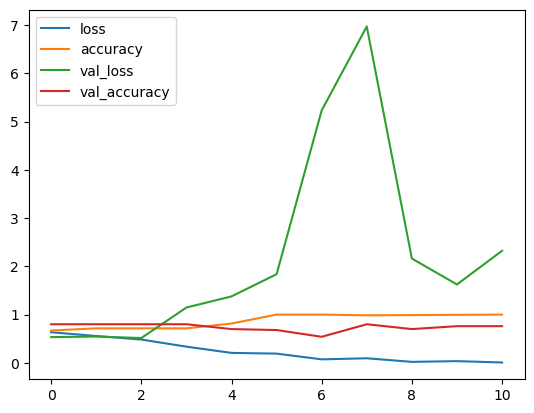

In [30]:
loss = pd.DataFrame(history.history)
loss.plot()

In [31]:
tahmin = model.predict(x_test)
tahmin = [1 if tahmin >= 0.5 else 0 for tahmin in tahmin]
accuracy_score(tahmin, y_true) * 100

2/2 [==============================] - 0s 7ms/step


76.0

### Prediction .csv file

In [32]:
sonuc = pd.DataFrame(columns = ['id', 'target'])
sonuc['id'] = sample_submission['id']

In [33]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,-1.380,0.001,-1.340,-0.371,-0.735,-0.545,-0.525,-1.139,1.263,-0.240,0.931,-1.151,0.938,0.720,-1.543,-1.467,0.402,0.538,0.614,-0.318,-1.417,0.471,-1.139,2.294,-0.577,-0.190,-1.252,-1.708,0.415,-1.450,2.212,0.669,2.079,-1.006,-0.867,1.165,1.110,-0.419,-0.807,0.464,1.571,...,1.309,-1.055,0.987,0.979,-0.805,2.190,0.451,0.200,-1.133,0.029,0.188,-0.756,-0.542,-0.231,0.306,-0.680,0.727,1.372,0.794,-0.930,0.652,-0.398,-0.236,1.621,0.089,-0.282,0.170,0.514,-0.321,1.038,-0.336,-1.170,0.245,-0.032,0.227,1.757,-1.513,-1.058,-0.559,0.664,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,0.584,2.620,1.373,0.257,0.322,-0.009,1.844,0.576,0.686,0.095,-0.906,-0.773,-0.781,-0.659,-1.284,-0.922,-0.097,-0.464,-0.277,-0.320,0.330,-0.780,1.050,2.206,-0.587,1.220,1.350,-0.779,-0.160,0.119,-0.029,-0.089,-0.219,-0.678,-1.141,-0.767,-1.287,0.085,0.290,0.222,2.432,...,0.118,1.318,-0.568,-0.488,-1.211,0.959,-1.622,0.280,1.574,1.640,0.513,1.831,0.584,0.482,-0.917,-0.148,-0.165,0.856,-0.029,-0.648,-0.506,0.462,-0.310,0.139,1.952,0.708,0.018,0.158,-1.415,-0.760,-0.191,-0.051,0.127,-0.340,-0.463,1.153,0.680,-0.624,-1.090,-0.681,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,0.714,0.566,-2.343,-0.716,-1.326,-2.521,-1.481,-0.310,-0.852,-1.010,-0.814,0.549,0.113,-0.017,0.803,0.308,-0.589,1.403,0.596,1.140,-0.731,-0.785,1.103,0.690,-1.630,0.591,0.072,-1.458,0.236,0.189,0.995,-0.822,1.281,-1.716,-1.918,0.068,-1.500,1.930,-1.036,-1.216,-1.208,...,-2.567,0.025,0.910,0.309,-0.527,0.363,-0.466,0.079,0.084,0.679,0.174,-0.042,-1.843,-0.136,0.277,-0.537,0.010,-1.904,-1.297,0.909,0.734,-0.319,0.009,-0.534,-0.267,-1.202,-0.139,0.221,-0.473,-0.842,-0.258,1.578,-2.053,0.542,-0.524,0.840,0.088,0.957,1.394,1.761,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,-0.205,-1.150,1.408,-0.625,0.296,-1.264,0.180,-0.595,0.277,2.246,2.334,1.059,-1.074,0.787,1.454,0.012,0.049,0.333,1.016,0.052,-1.179,-0.501,0.157,-0.289,-2.072,-0.827,0.091,-1.373,1.407,-1.569,2.060,-0.170,-0.831,-0.368,1.248,-1.058,1.916,-1.593,-1.273,0.018,0.422,...,0.461,-1.279,-0.509,1.138,1.605,1.784,0.294,0.986,1.957,-1.137,0.554,1.532,-0.485,0.524,1.013,1.943,-1.576,0.292,-0.821,-0.395,0.728,-0.328,-0.441,0.273,-1.213,0.924,0.439,-1.023,-0.091,-0.507,-1.159,-0.644,0.037,0.518,2.475,-1.029,-0.250,0.971,-0.270,-0.500,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,-0.400,0.636,0.580,-0.464,-0.102,-0.577,-0.095,0.696,-0.378,1.628,0.770,-0.355,0.426,0.882,-2.685,-0.043,-0.665,1.905,0.726,-1.239,0.615,-0.262,0.800,0.529,-0.883,-2.015,1.083,-0.402,0.839,0.931,1.665,-0.460,-1.558,0.016,-2.362,1.769,0.212,-0.778,-0.896,-0.276,-0.081,...,-0.633,-0.872,-0.104,2.161,0.950,0.134,0.171,-0.476,-0.206,0.857,0.017,-0.860,0.739,-0.803,-0.925,1.020,-0.056,-0.214,1.165,-0.494,0.700,-0.274,-1.253,-0.624,-2.015,0.057,-1.496,-0.068,0.698,0.236,-0.506,-0.367,-1.885,-0.541,-0.387,-1.306,-0.155,0.476,-1.131,0.080,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [34]:
tahmin = model.predict(test_data)
tahmin

618/618 [==============================] - 3s 5ms/step


array([[1.9045513e-02],
       [9.8877621e-01],
       [1.3448969e-05],
       ...,
       [1.3065013e-01],
       [2.1907795e-06],
       [4.6389144e-02]], dtype=float32)

In [35]:
tahmin = [1 if tahmin >= 0.5 else 0 for tahmin in tahmin]
tahmin

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [36]:
sonuc['target'] = tahmin
sonuc

,id,target
0,250,0
1,251,1
2,252,0
3,253,0
4,254,1
...,...,...
19745,19995,0
19746,19996,0
19747,19997,0
19748,19998,0


In [37]:
sonuc.to_csv('DL.csv', index = False)